# Polarization prism with total internal reflection

Run and plot polarization analyses in a prism using total internal reflection.

In [1]:
from pathlib import Path

import  numpy as np
import matplotlib.pyplot as plt

import zospy as zp

Input values

In [2]:
# Input Jones Vector
jx = 1
jy = 1
x_phase = 0
y_phase = 0

Connect to OpticStudio in standalone mode

In [3]:
zos = zp.ZOS()
zos.wakeup()

assert zos.create_new_application(), "Could not connect to OpticStudio in standalone mode"

oss = zos.get_primary_system()

Load example file containing the optic system definition. The optic system simulated here looks like this:

![Optical system schematic](optical_system.png)

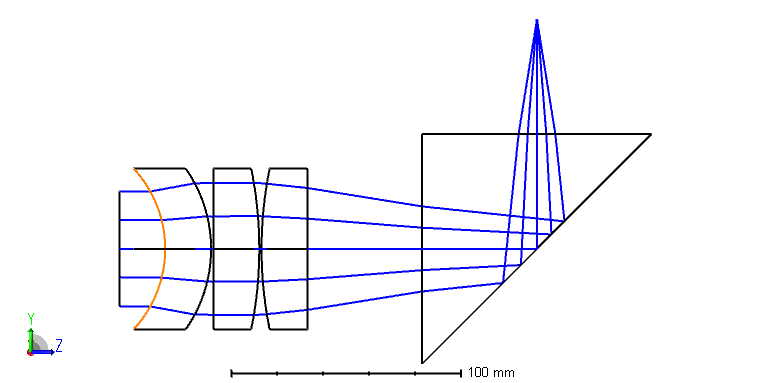

In [4]:
# OpticStudio requires absolute paths
example_file = Path("Prism using total internal reflection.zmx").absolute()
print(f"Loading file {example_file} ...")
oss.load(str(example_file))

Loading file D:\code\zemax\zospy-github\examples\Polarization Prism\Prism using total internal reflection.zmx ...


Run the Transmission analysis from `zospy.analyses.polarization.transmission`.

In [5]:
return_transmission = zp.analyses.polarization.transmission(
    oss, jx=jx, jy=jy, x_phase=x_phase, y_phase=y_phase, sampling="64x64"
)

print(
    "Field position \tTransmission",
    f"{return_transmission.Data.FieldPos}  \t\t\t{return_transmission.Data.TotalTransmission * 100}%", sep="\n"
)

Field position 	Transmission
0.0  			64.1754205%


Get a polarization map using `zospy.analyses.polarization.polarization_pupil_map`

In [6]:
result = zp.analyses.polarization.polarization_pupil_map(
    oss, jx=jx, jy=jy, x_phase=x_phase, y_phase=y_phase, sampling="17x17"
)
df = result.Data.Table

print(df)

        Px     Py        Ex        Ey  Intensity  Phase(Deg)  Orientation
0   -1.000  0.000  0.478226  0.673308   0.682044  137.096154   122.267525
1   -0.875 -0.375  0.505769  0.668042   0.702082  134.067624   123.969140
2   -0.875 -0.250  0.501666  0.666814   0.696309 -225.063934   123.893391
3   -0.875 -0.125  0.496899  0.665856   0.690273 -223.867939   123.809086
4   -0.875  0.000  0.491385  0.665160   0.683897 -222.250933   123.722118
..     ...    ...       ...       ...        ...         ...          ...
192  0.875  0.000  0.672867  0.476981   0.680261 -222.668754   147.755937
193  0.875  0.125  0.678455  0.475828   0.686713 -220.284484   147.700755
194  0.875  0.250  0.684247  0.474248   0.693105 -217.117400   147.589012
195  0.875  0.375  0.690386  0.472140   0.699549  147.216066   147.420181
196  1.000  0.000  0.683282  0.457999   0.676638  136.423377   149.777610

[197 rows x 7 columns]


Plot the pupil map

Text(0.5, 1.0, 'Prism using total internal reflection')

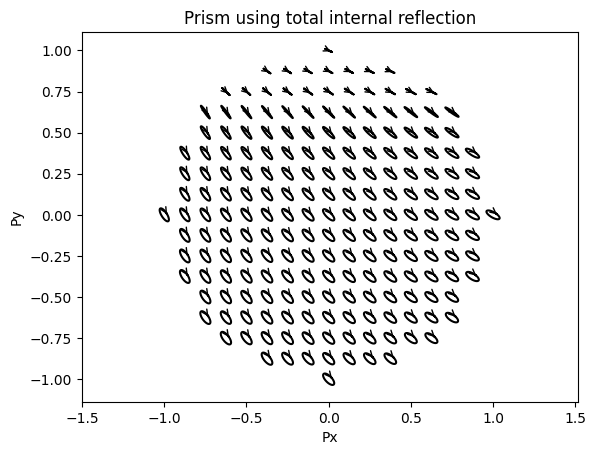

In [7]:
xy_length = len(np.unique(df["Px"]))

for i in range(len(df)):
    # E-field coordinates
    phi = np.linspace(0, 2 * np.pi) - np.pi / 3
    Ex = np.real(df["Ex"][i] * np.exp(1j * phi)) / xy_length + df["Px"].iloc[i]
    Ey = (
        np.real(
            df["Ey"].iloc[i]
            * np.exp(1j * phi + 1j * df["Phase(Deg)"].iloc[i] * np.pi / 180)
        )
        / xy_length
        + df["Py"].iloc[i]
    )

    # Plot E-field trajectories
    line = plt.plot(Ex, Ey, "k")

    # Add arrows
    line[0].axes.annotate(
        "",
        xytext=(Ex[0], Ey[0]),
        xy=(Ex[1], Ey[1]),
        arrowprops=dict(arrowstyle="->", color="k"),
    )
plt.xlabel("Px")
plt.ylabel("Py")
plt.axis("equal")
plt.title(example_file.stem)